# 캐글 데이터 다운로드 받기 via Colab


### 1. Kaggle API 설치
- 다음과 같이 실행 : !pip install kaggle

In [7]:
!pip install kaggle

### 2. Kaggle Token 다운로드
- Kaggle사이트 - 내 계정 - API - [Create New API Token]클릭 => kaggle.json 파일 다운로드

- 바탕화면으로 옮긴뒤, 아래 코드 실행

In [8]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# kaggle.json을 아래 폴더로 옮긴 뒤, file을 사용할 수 있도록 권한을 부여한다. 
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
uploaded file "kaggle.json" with length 65 bytes


In [9]:
# 파일이 제대로 업로드 되었는지 확인.
ls -1ha ~/.kaggle/kaggle.json

/root/.kaggle/kaggle.json


### 3. 구글 드라이브 연동
1. 구글 드라이브 마운트

In [15]:
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. 프로젝트 파일 생성 및 다운로드 받을 경로 이동

In [13]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/inflearn_kaggle/data'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/inflearn_kaggle/data


In [16]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/inflearn_kaggle/data


### 4. Kaggle 데이터 불러오기

In [17]:
! kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         95           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        199           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        457           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       3095           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      24915            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       6191           False  
connectx

In [18]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 9.08MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 3.84MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 417kB/s]


In [19]:
!ls

gender_submission.csv  test.csv  train.csv


In [1]:
# Kaggle 사이트에서 파일경로 설정 ->  Google Colab에선 해당 Code를 실행하지 않는다.
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# data analysis
import pandas as pd # SQL같은 데이터프레임을 쉽게 다룰 수 있는 라이브러리
import numpy as np # numeric에 대한 python (수치해석, 벡터연산 등 가능)
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # visualization 스타일로 seaborn 모양을 사용.
sns.set(font_scale=2.5)

import missingno as msno # dataset의 null데이터를 쉽게 보여주는 library

#import warnings, warning이 많이 나오는데, 무시하기위해
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# 그래프를 새로운 창으로 보여주지않고, 이 notebook에 바로 보여주게끔.

# 데이터 분석 과정
1. data set 확인 (null이 있는지, 데이터가 정제되어있는지)
2. 탐색적 데이터 (data exploration) - insight, visualization 등
3. feature engineering (모델을 만들기전에 성능을 높이기 위해서 feature(컬럼)들을 engineerring. 구간을 나누거나, 텍스트처리하거나.. )\
feature 정보들을 이용해서 모델학습하기위해서는 숫자로 바꿔줘야해.\
즉, feature들을 feature 벡터로 만들어줘야함. (각 로우의 컬럼들이 숫자면, 벡터(숫자들의 배열)가 됨.)
4. 모델 생성. (sklearn으로)
5. 모델 학습 및 예측. (train.set으로 모델학습시키고, test.set으로 예측)
6. 모델 평가 (정확도 등)

# **1. data set 확인**

In [24]:
cd /content/drive/My Drive/data/

[Errno 2] No such file or directory: '/content/drive/My Drive/data/'
/content/drive/My Drive/Colab Notebooks/inflearn_kaggle/data


In [25]:
# pandas를 활용해서 데이터 확인 가능.
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/inflearn_kaggle/data/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/inflearn_kaggle/data/test.csv')


# data set의 처음부분을 보여주는 메서드 - head(5) : 5줄 보여줘라.
df_train.head()
# data set의 끝부분을 보여주는 메서드 - tail()
# data set의 info보여주는 메서드 - info()
print('_'*40)
df_train.info()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
df_test.info() # 'Survived' 컬럼이 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Initial      418 non-null    object 
 12  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


## **1-1. feature 속성**
* survived : target label (0,1)
* Pclss : categori(분류) feature (순서o)
* Sex : binary
* Fare, Age : continues
* SibSp : quantity(개수)
* Ticket : String (mix of numeric and alphanumeric)
* Cabin : alpha numeric
* Embarked : S,C,Q (순서있는 카테고리)

In [26]:
df_train.describe()  # 각 column의 간단한 통계적 수치를 알려줌.
# Age의 count가 714 -> null 데이터가 있음을 알 수 있음.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_train.max() # 각 column의 최댓값

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [28]:
df_train.shape # 차원을 알려줌. 891행의 12컬럼

(891, 12)

In [29]:
df_train.columns # coloumn들을 return

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
# 각 column에 null데이터가 몇개 있는지 percent로 확인.
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)  # Age, Cabin, Embarked에 null값 있음.
    
    # 보통 null데이터는 채워주는게 성능이 높아짐.

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


## **1-2. python의 문자열 속 format**
* 정렬x {:10}
* 왼쪽 정렬 {:<10}
* 오른쪽 정렬 {:>10}
* 소수점 2번째자리 {:.2f}

### **코드 설명**
* df_train[col]  # df_train 에서 현재 column 보여주기.
* type(df_train[col]) # pandas의 series 타입.
* pandas의 기본 객체는 series. 
* series는 index, value로 이루어짐
* 여러 series가 묶이면 하나의 data frame.

* df_train[col].isnull() # null이면 true(1), null아니면 false(0)
* df_train[col].isnull().sum() # sum() : # null일 때 1이므로 합은 null의 개수로 이해하면 됨.
* df_train[col].shape # 차원알려줌.- 891
* df_train[col].isnull().sum() / df_train[col].shape[0] # 전체(891)로 나누니까 총 데이터중 null값의 percent를 알게됨.

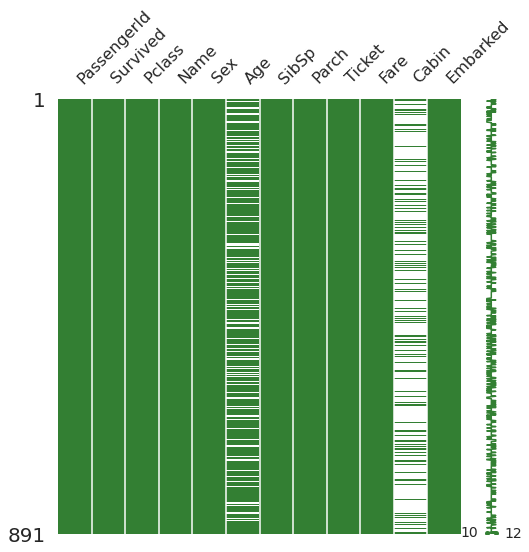

In [31]:
# null값이 얼마나 많은지 확인.
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

### **코드 설명**
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))
* matrix형태로 만들어주는 missingno library
* df=df_train.iloc[] : input으로 데이터프레임을 넘겨줌.
* iloc[]: index location, 내가 원하는 row, column, 위치의 데이터프레임을 가져오는 메서드
* [1: -행 처음부터 끝까지, [3: -행 3번째부터 끝까지, [3:5, -행 3,4번째.
* , 2:] -열 2번째부터 끝까지
* df_train.iloc[3:5, 2:] -df_train의 행 3,4번째, 열 2번째부터 끝까지 출력
* figsize(가로,세로) = figure size로, 그림 크기조절
* color=(a,b,c) : RGB값
* null이 어디에 있는지 중점. (빈 부분이 null)

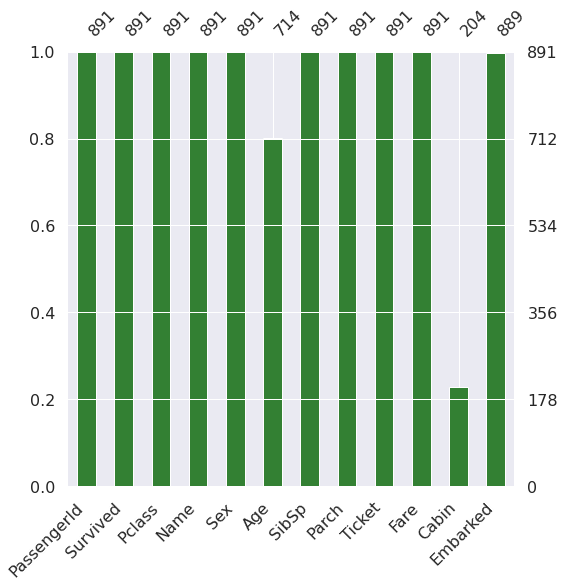

In [32]:
# percent가 함께 나옴. 즉, 개수에 중점.
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

# **2. 탐색적 데이터 (data exploration)**

(1) target label이 어떤 distribution을 가지고 있는지 확인.
why? target label이 얼마나 balance있는지에 따라 모델 설정 및 모델 평가 방법이 달라짐.

ex) 100명중 1명 생존 -> unbalanced,
    100명중 50명 생존 -> balanced

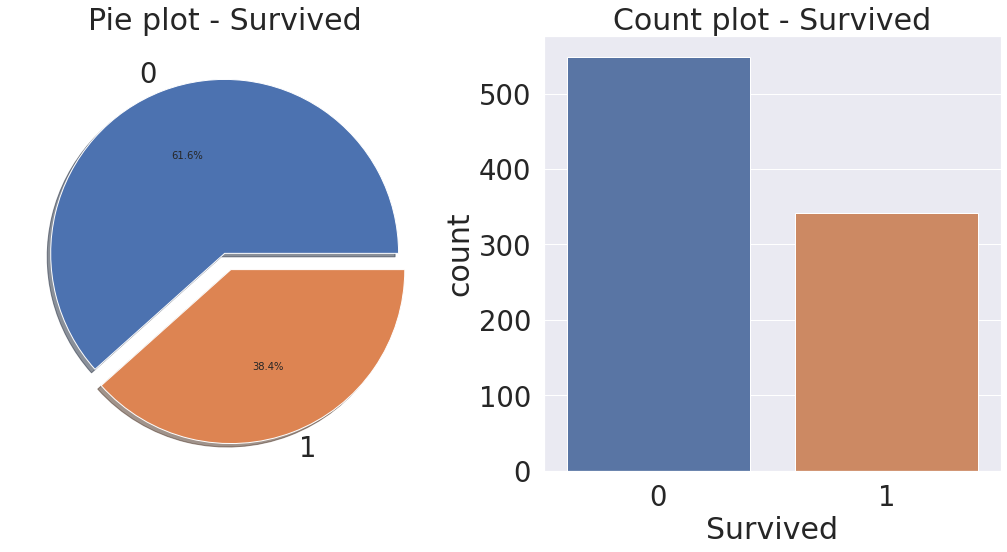

In [33]:
f, ax = plt.subplots(1, 2, figsize=(18,8)) # plt의 도화지를 준비.
# plt.subplots(a,b, figsize=(c,d)) : 큰 틀에 a행, b열로 나누고, 행길이 c, 열길이 d
# plt.subplots(1,2, figsize=(18,8)) : 큰 도화지에 한 행(길이18)에 2개의 열(길이8)을 생성.

# pie로 0과 1의 퍼센트를 보여줌.
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# value_counts() : 'Survived' 열에서 각 레이블(0,1)의 개수를 반환.
# explode=[] : 터지다. 각 label을 분리시키는 옵션
# autopct='%1.1f%%': percent의 형식 나타내는 옵션
# ax=ax[0] : 팔레트의 어떤 부분에 그릴 것이냐. ax 명령 실행하면 2군데.
# shadow : 그림자 생성 옵션
ax[0].set_title('Pie plot - Survived') # 제목
ax[0].set_ylabel('') # y축의 label 생략.

# count해주는 plot으로 0과 1의 개수를 보여줌
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()  # 두 plot 출력.

# 생존자가 38.4%, 342명이니까, balanced함.

### **pie plot 코드설명**
#### df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
* value_counts() : 'Survived' 열에서 각 레이블(0,1)의 개수를 반환.
* explode=[] : 터지다. 각 label을 분리시키는 옵션
* autopct='%1.1f%%': percent의 형식 나타내는 옵션
* ax=ax[0] : 팔레트의 어떤 부분에 그릴 것이냐. ax 명령 실행하면 2군데. ax[0]은 1열, ax[1]은 2열
* shadow : 그림자 생성 옵션

### 추가설명
* type(df_train['Survived'].value_counts()) # 보통 일관성있는 series로 반환.
* df_train['Survived'].value_counts().plot() # series는 plot()을 가지고 있음.
* df_train['Survived'].value_counts().plot().pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # pie plot으로 표현

### count plot 코드 설명
sns.countplot('Survived', data=df_train, ax=ax[1]) 
* countplot([input할 컬럼명], [input할 데이터프레임명], 위치ax=ax[1])

# 2. 탐색적 데이터 분석(Exploratory Data Analysis, EDA)
본격적인 데이터 분석!

In [34]:
df_train.shape # 11개 feature 중 어떤 feature가 중요한지, 서로 어떤 상관관계가 있는지.
# 모델에 어떤 feature를 쓰면 좋을지에 대한 insight를 얻을 수 있음.
# 나의 주장을 말할 수 있도록 어떤 그림을 그릴지 중요.

(891, 12)

## 2.1 Pclass
ordinary data (소수형이면서 범주형)
Pclass에 따른 생존률을 알아보자.

In [35]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
# class별로 생존이 몇개 있는지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [39]:
df_train[['Pclass', 'Survived']] # 데이터 프레임의 column을 가져오는 방법
df_train[['Pclass', 'Survived']].groupby # group으로 묶어준다.
df_train[['Pclass', 'Survived']].groupby(['Pclass']) # 'Pclass'를 기준으로 그룹핑한 객체 하나 생성됨.
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum() # 각 Pclass끼리 더한 값. 즉 **생존자의 개수** 알수있음. 
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count() # Pclass에 해당하는 **샘플의 개수**를 센 값.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # index로 두느냐. 이 옵션을 추가해야 나중에 그림을 그릴 수 있음.

,Survived
Pclass,
1,216
2,184
3,491


In [37]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='Pastel1')
# crosstab()은 각 Pclass와 Survived 컬럼을 table로 같이 보여줌.
# margins은 Total 표시여부
# .style.background_gradient(cmap='summer_r') : 값의 기울기에 따라 배경색 바꿈. 
# color map scheme에는 다양한 색옵션 있음. ex) Blues, Purples, Pastel1, cool

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


1. *평균을 구하기. 생존율이라생각할 수 있음.*
* df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean() 


2. *'Survived' 컬럼 기준으로 정렬*
* df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')


3. *내림차순*
* df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False) 


4. *index를 안넣게 되면 plot에서 두가지 값을 처리함.*
* df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot() 


5. *더 쉽게 보려면*
* df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() 
 : Pclass 1,2,3의 생존율이 60%, 45%, 22%이상 -> Pclass가 높을 수록(1일수록) 생존률이 높은 것을 확인가능.

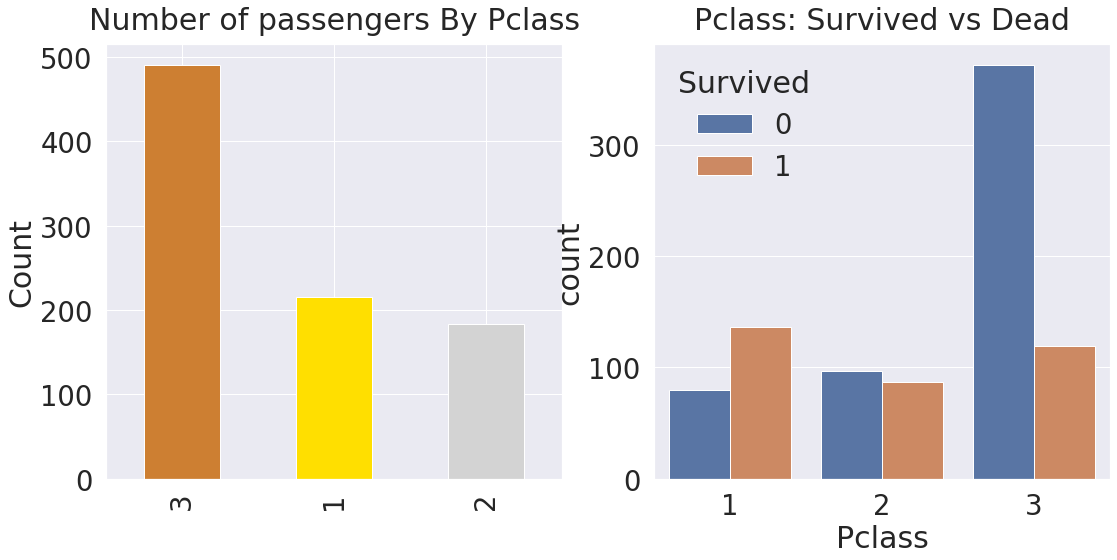

In [38]:
# 더 나은 그림을 위해
y_position = 1.02 # title과 그림 간의 거리 조정.
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # hue옵션에 색을 하나 지정해줌.
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()
# 두번째 그림을 통해, Pclass가 높을 수록(3-2-1), 생존률이 높다.

## 2.2 Sex(성별)
pandas와 seaborn을 이용!

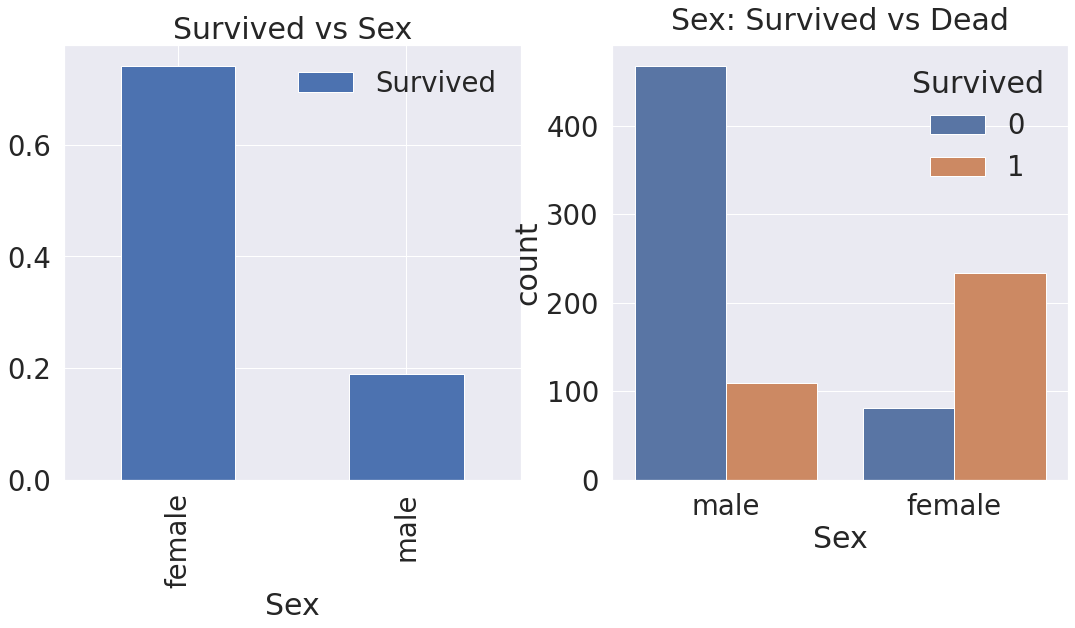

In [40]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
# df_train의 'Sex'와 'Survived'컬럼 가져와서
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead', y=y_position)
plt.show()

### 문법 설명하기
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()  # 성별이 column으로 감.

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0]) # 위치는 왼쪽.

In [41]:
# pandas의 crosstab 이용
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='Pastel1')

# 결과를 통해 'Sex'도 feature로 쓸 수 있을 것이라 예측 가능.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.2-(1) Both Sex and Pclass
dimension을 3가지로 해보고 하나의 plot으로 나타내보자. seaborn의 factorplot으로 가능.

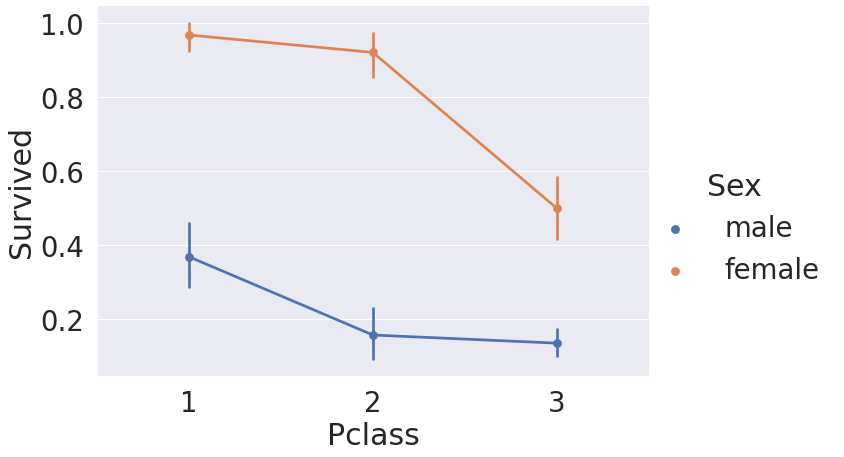

In [45]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size= 6, aspect=1.5) # x축:Pclass, y축:Survived, 색깔: Sex
# axis때문에 size를 넣어줘야함. size는 캔버스크기

Pclass가 1일 경우, male은 40%, female은 90% (남성이 생존확률 낮음.)
Pclass가 1->2->3일 수록, 생존률이 낮아짐.

* 정리
- Lady first.
- Money brings survival?

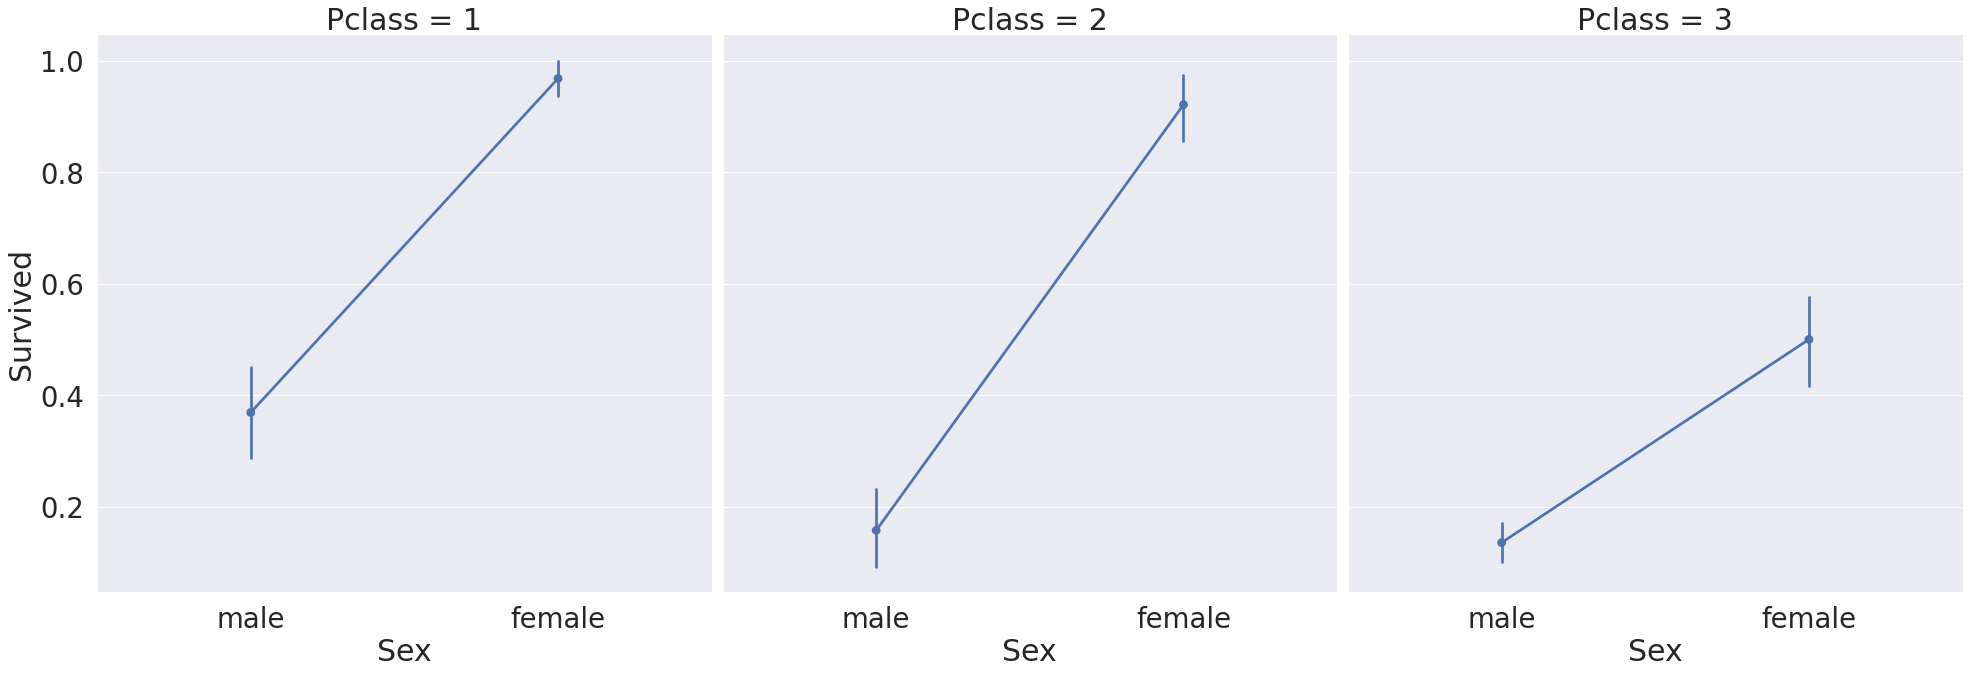

In [46]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)
# 보는 방식을 바꾼 것.
# x축이 Sex, y축이 Survived, 클래스가 Pclass로. (Pclass의 수가 커질수록, Survived 크기는 작아짐.)
# 그래프 속 선 끝의 세로방향 줄 : error bar (오차범위)
# error bar가 작으면 신뢰도가 높음. error bar가 높으면 신뢰도가 낮음.

## 2.3 Age

In [47]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))
# {:.1f} : .1f는 소수점 첫째자리까지 표시.

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


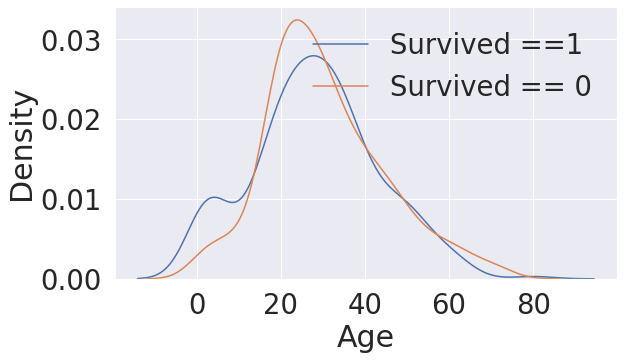

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
# add_subplot(111) # subplot을 추가할 수 있기위해 위의 코드를 주로 사용
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived ==1', 'Survived == 0'])
plt.show()

# 나이가 어릴 수록 생존률이 높은 것을 알 수 있음.

KDE(Kernal Density Estimator) : 커널 밀도 추정, 데이터들의 분포가 어떻게 되어 있는지 estimate. 히스토그램을 곡선으로 표현한 것. 커널로 밀도를 추정하는 것이라 생각하면 됨.
- 인자로 데이터를 넣어주면 되는데, 위에서 데이터는 df_train['Survived']==1]['Age'] 이다.
- 'Survived' ==1인 행에서 'Age'열만 출력한다.

### **코드 분석**
* sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)

- df_train['Survived'] == 1 : Survived 컬럼이 1이면 True로, 0이면 False로 출력. (Boolean형으로 출력)
- df_train[df_train['Survived'] == 1] : Survived가 True인 행만 출력됨.
- df_train[df_train['Survived'] == 1]['Age'] : Survived가 True인 행의 Age 컬럼을 Series로 반환.
- sns.kdeplot(df_tarin[df_train['Survived'] == 1]['Age']) : seaborn의 kdeplot에 넣을 것이다.

### 추가

df_train.iloc[2, :] # index로 열or행 데이터 가져오는 메서드
df_train.iterrows()  
- generator object DataFrame.iterrows 라고 뜸.
- generator는 iterator를 생성해주는 함수
- iterator는 next() 메서드를 이용해 데이터에 순차적으로 접근가능한 object
- 만약 가장 마지막 데이터에서 next() 로 다음 데이터를 불러 올수  없을 경우 StopIteration exception을 발생시킨다. 
- iterable은? member를 하나씩 차례로 반환 가능한, 즉 iterator로 변환 가능한 object를 말한다. 
- iterable 의 예로는 sequence type인 list, str, tuple 

### **결론**
- iterable한 객체 : iterator로 변환 가능한(값을 한개씩 순차적으로 접근이 가능하도록 만들 수 있는) 객체.
- iterator : 값을 한개씩 순차적으로 접근 가능한 객체

- 만약 list에 next()를 쓰면, 'list' object is not an iterator 라는 오류가 뜬다.\
li = [1,2,3,4,5]\
next(li) #'list' object is not an iterator

- list는 iterator로 변환 가능한 객체(iterable한 객체)이다. (iter 메서드)
li = [1,2,3,4,5]\
li_iter = iter(li)\
next(li_iter) # 1\
next(li_iter) # 2\
next(li_iter) # 3\
next(li_iter) # 4\
next(li_iter) # 5\
next(li_iter) # StoprIteration

- for문에 list를 돌려보면 순차적인 접근이 가능하다. iterator로 바꿔주지 않아도!
- 즉, for문에서 내부적으로 list를 iterator로 바꾸어 순차접근 하고있는 것. 
- for문을 돌려서 순차접근이 가능한 객체는 모두 iterable하다.

In [49]:
for row in df_train.iterrows():  # 0열부터 모든 행을 볼 수있음. 
    print(row)   # 0부터 890번까지의 데이터 출력.

Streaming output truncated to the last 5000 lines.
Age                                                       33
SibSp                                                      0
Parch                                                      2
Ticket                                                 26360
Fare                                                      26
Cabin                                                    NaN
Embarked                                                   S
Name: 506, dtype: object)
(507, PassengerId                                              508
Survived                                                   1
Pclass                                                     1
Name           Bradley, Mr. George ("George Arthur Brayton")
Sex                                                     male
Age                                                      NaN
SibSp                                                      0
Parch                                                      0
Ti

### matplotlib 그릴때 도화지를 준비하는 3가지 방식
#### fig 사이즈를 10,10으로 설정해보자.

* f = plt.figure(figsize=(10,10)) : axis로 반환하지 않고 fig로 반환.
* f, ax = plt.subplots(1, 1,figsize=(10,10)) : axis(축)을 반환해줘서 축으로 그림.
* plt.figure(figsize=(10, 10)) : axis를 받지 않은 상태로 도화지만 까는 방법


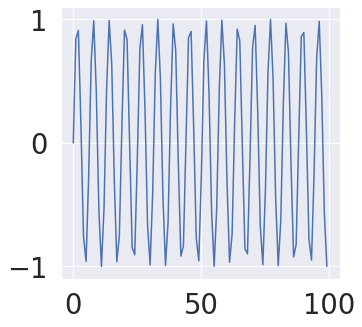

In [53]:
# 1. f = plt.figure(figsize=(10,10))
f = plt.figure(figsize=(5,5))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

Text(0.5, 0, 'a')

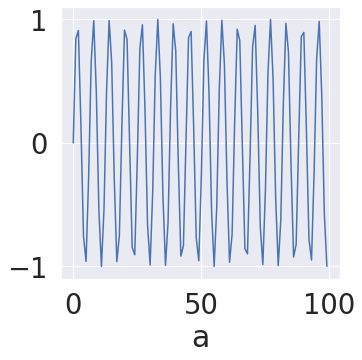

In [54]:
#2. f, ax = plt.subplots(1, 1, figsize=(5, 5))
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('a')  # axis일 때는 set_xlabel()

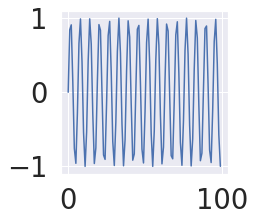

In [55]:
# 3. plt.figure(figsize=(3, 3)
plt.figure(figsize=(3, 3))
a = np.arange(100)
b = np.sin(a)

plt.plot(b)

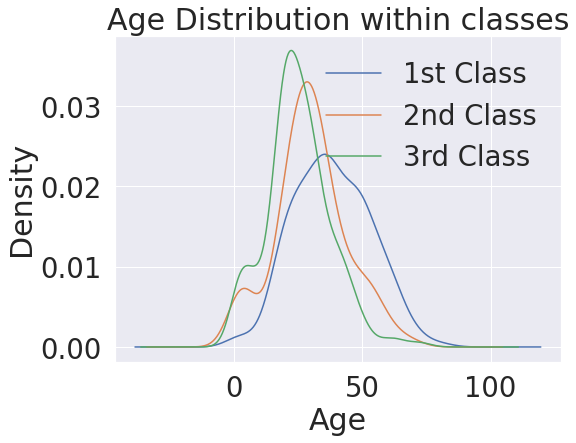

In [56]:
# 'Survived'가 없는, 단순한 distribution!!!!!!!!!
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde') 
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde') 
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde') 
# Pclass가 1인 Age 출력.종류는 kde
# sns.kdeplot(df_train['Age'][df_train['Pclass'] == 1], ax=ax)와 같은 결과.
# 즉, 자기가 더 편한 문법으로 익혀두면 됨. 혹은 더 시각화가 예쁜 문법으로.

# 두 열 위치바꿔도 똑같은 결과.
# df_train[df_train['Pclass'] == 1]['Age'].plot(kind='kde')

# kind 옵션에 종류만 달리 해주면 다른 시각화.
# df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')

plt.xlabel('Age')  # axis로 할경우, 문법이 다름. ex.xexislabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# class가 높을수록 나이가 많음.


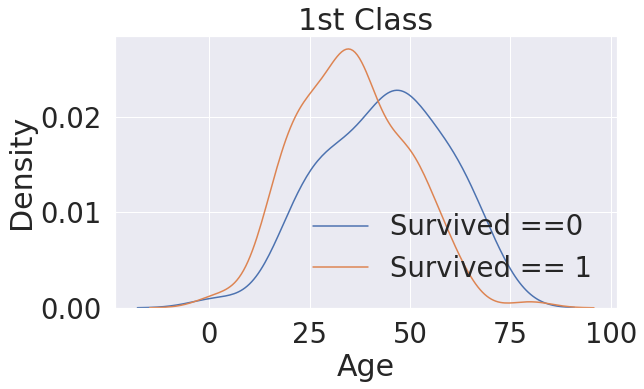

In [57]:
# 
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
# add_subplot(111) # subplot을 추가할 수 있기위해 위의 코드를 주로 사용
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived ==0', 'Survived == 1'])
plt.xlabel('Age')

plt.title('1st Class')
plt.show()

# 젊을수록 생존 확률이 높다.

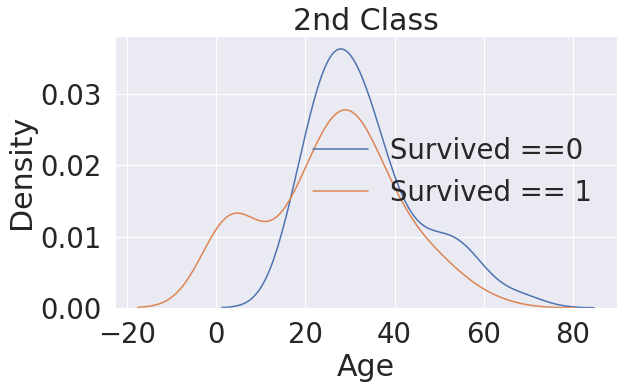

In [58]:
# 
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
# add_subplot(111) # subplot을 추가할 수 있기위해 위의 코드를 주로 사용
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived ==0', 'Survived == 1'])
plt.xlabel('Age')

plt.title('2nd Class')
plt.show()

# 30대는 고루 사망 및 생존했지만, 보통 나이가 젊을 수록 생존률이 높다.
# 추정식이어서 -가 나옴.

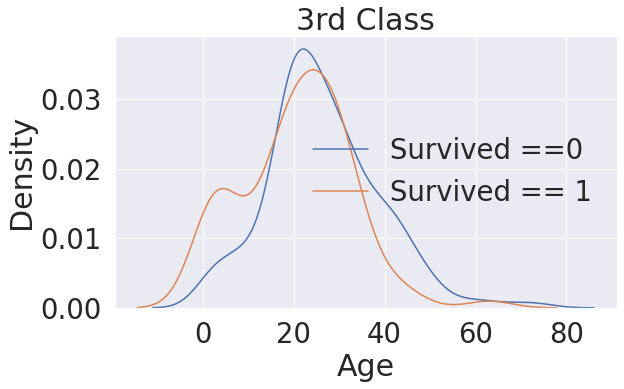

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
# add_subplot(111) # subplot을 추가할 수 있기위해 위의 코드를 주로 사용
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived ==0', 'Survived == 1'])
plt.xlabel('Age')

plt.title('3rd Class')
plt.show()

# 젊을 수록 생존률이 높음.
# 음수치가 있는 이유?
# 아래의 hist를 근사한게 해당 kde 그래프.
# hist를 스무스하게 그리다보니까 0에서 안끊기고 마이너스까지 이어진 것.

- Pclass 등급이 올라갈 수록 나이가 많은 사람들이 있다.
- Pclass 등급이 올라갈 수록 Survived==0인 확률이 높다. 즉 죽은 사람들이 많다.
- 한 Pclass 등급 내에서 나이가 많은 사람들의 생존률이 더 낮다.

Text(0.5, 1.0, 'Age Distribution within classes')

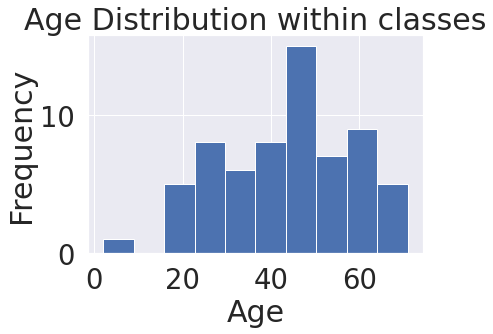

In [60]:
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].plot(kind='hist')
#df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].plot(kind='hist')

plt.xlabel('Age')  # axis로 할경우, 문법이 다름. ex.xexislabel('Age')
plt.title('Age Distribution within classes')

나이별 생존 확률을 알아보자.

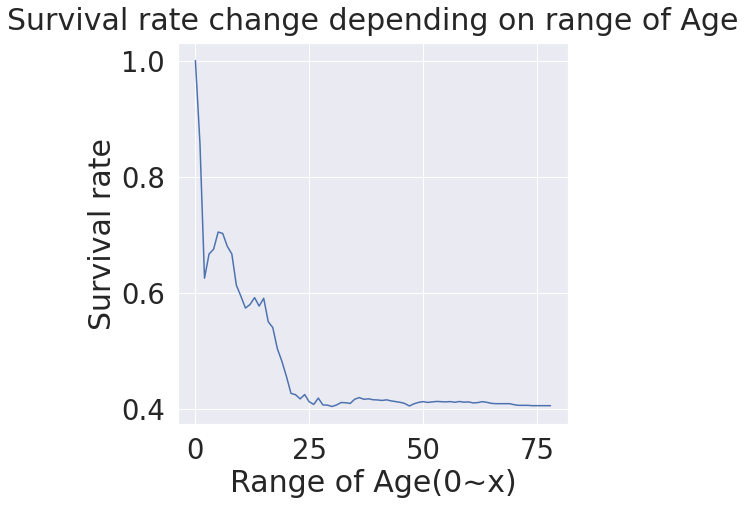

In [61]:
change_age_range_survival_ratio = []  # age 범위를 다르게 했을때 survived율이 어떻게 변하는지

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02) # y=1.02: 그래프에서 타이틀의 위치를 옮겨줌.
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

# 3-4살까지 생존률 8-90% 찍다가...
# 10살에는 58% 정도 생존
# 결국 80살쯤에는 40% 생존으로 수렴.

## 코드 분석
i = 10\
df_train[d_train['Age'] < i]['Survived'].sum()/len(df_train[df_train['Age'] < i])

10살보다 작은 친구들의 생존의 합을 그 친구들의 수로 나눠서 생존확률을 확인. 

## 2.4 Age, Sex, Pclass (violinplot)
3차원 dimend를 볼 수 있는 시각화는 여러가지 있음. 그중 seaborn의 violinplot을 사용할 예정.

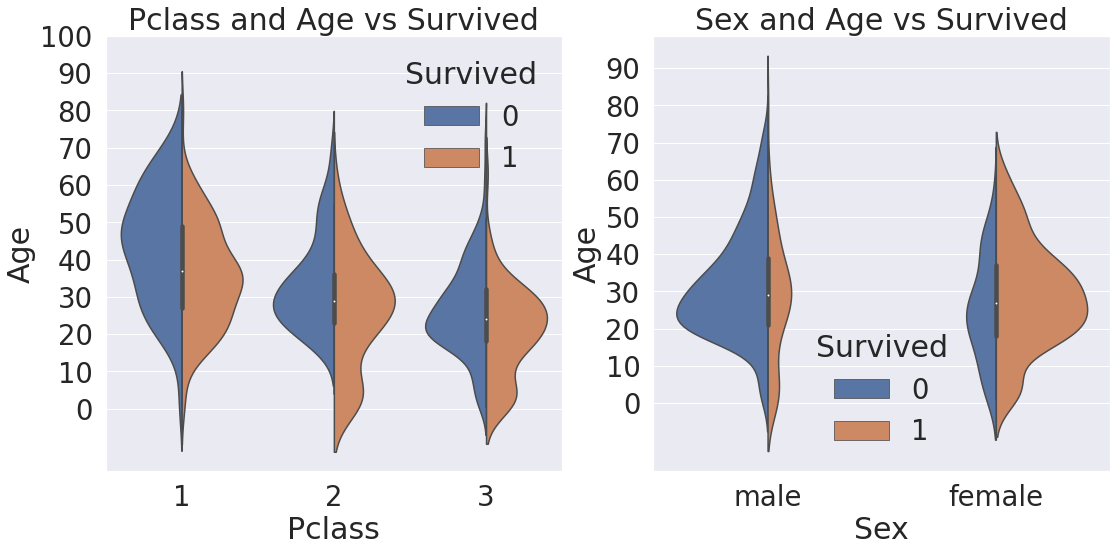

In [62]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='width', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 100, 10))
plt.show()

### sns.violinplot() 옵션
* hue 옵션 : 'Survived' 컬럼을 색조로 표시.
* scale\
@ area : 같은 면적으로 나타내게되면, x축 컬럼의 차이는 알 수 없지만, 
violinplot에 그려지는 컬럼 내에서 차이(비율)는 두드러지진다.
ax[0]을 예시로 얘기하면, Pclass 1, 2, 3 간 차이는 알기 힘들지만 Pclass 1에서 Age가 적을 수록 생존률이 높다는 것은 알 수 있음.\
@ count : 숫자의 개념이 더 들어가서 (수치적으로 보기 제일 좋음.) x축간의 차이점도 느낄 수 있음.\
@ width : 같은 width. area보단 차이점이 있지만 비슷함..

* split 옵션 : hue옵션으로 나타내는 컬럼을 더 세부적으로 분리해서 표현할지(True) 말지(False)

### set_yticks(range(a,b,n)) : a부터 b-n까지 n 간격으로 y축 출력
y축의 범위와 간격을 지정하는 메서드. grid는 자동으로 생성됨.\
ex) ax[0].set_yticks(range(0, 110, 10)) : 10 단위로 0부터 100까지 출력.

## 2.5 Embarked
탑승한 항구
이 항구의 생존률을 알아보자.

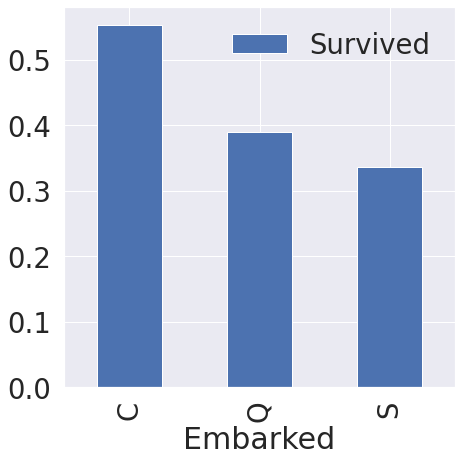

In [63]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

# 1행 1열 7*7모양 canvas
# 'Embarked' 컬럼으로 그룹화한 후에 Survived의 평균을 보는데 'Survived' 컬럼을 기준으로 내림차순한다. 이를 bar로 보여준다. 위치는 ax!
# sort_values(by=)대신 sort_index()로 하면, 인덱스로 정렬할 수 있음.
# ascending=False : 내림차순.

feature importance :  모델이 어떤걸 중점적으로 여겨서 만들어졌냐를 알려줌.

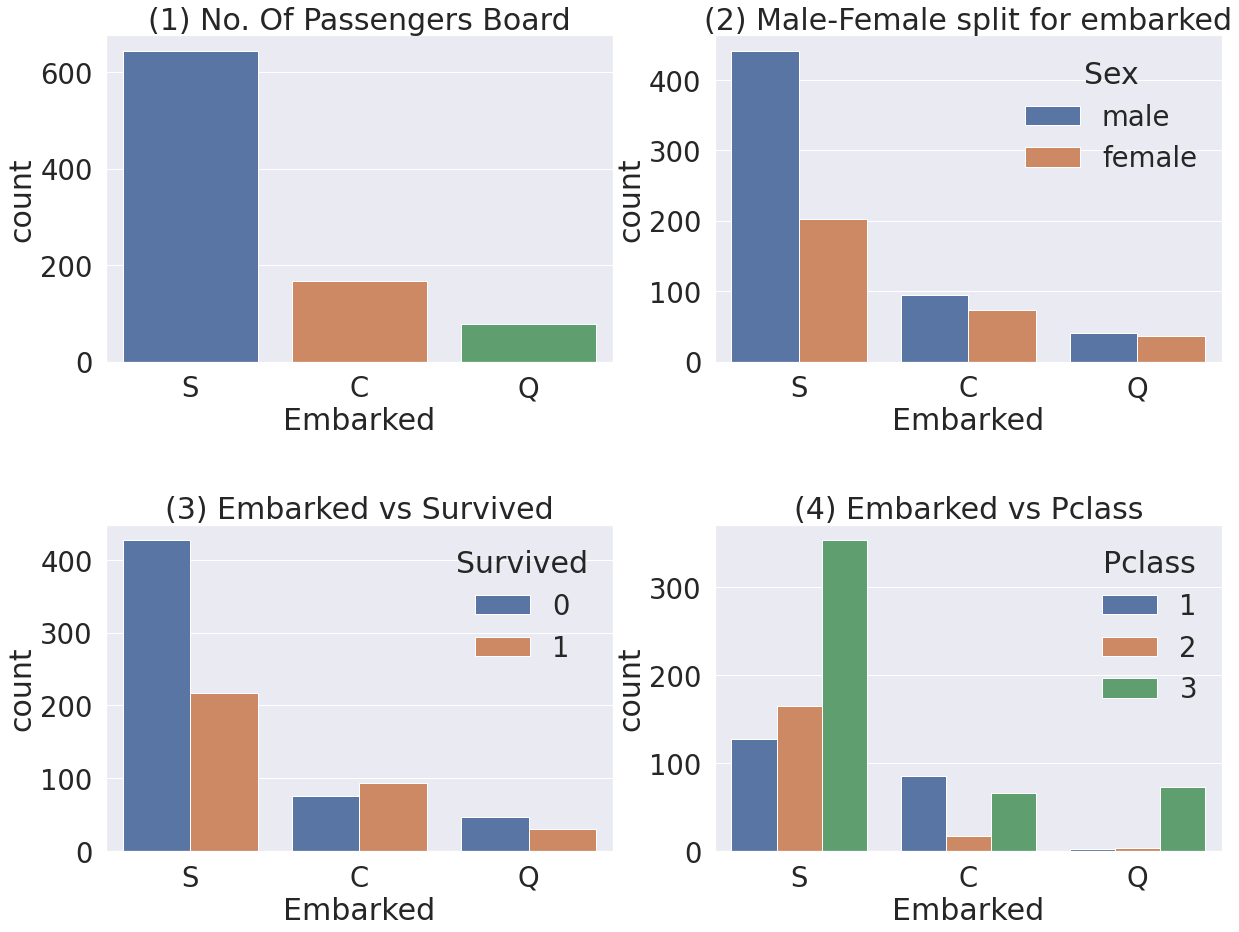

In [69]:
# 'Embarked'를 다른 feature와 엮어보자.
f, ax = plt.subplots(2, 2, figsize=(20,15))  # 2행 2열
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of Passengers Board')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0,1].set_title('(2) Male-Female split for embarked')
# subplots(1,2)이면 ax[0],ax[1]로 1차원인데
# subplots(2,2)이기 때문에 grid형식으로, ax[0,0], ax[0,1]

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5) # 좌우간격 wspace, 상하간격 hspace 맞춰줌.
plt.show()

## 2.6 FamilySize
sibling(친척) + Parch(배우자와 자녀) => family

In [88]:
# 새로운 컬럼으로 FamilySize를 만들어보자. 
# Pandas의 Series는 숫자끼리 연산 가능!!!!!!!!
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

# df_test도 해주자.
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']


Maximum size of Family:  10
Minimum size of Family:  0


### Pandas의 Series끼리는 연산이 가능하다.
- df_train['SibSp'] / df_train['Parch']
- df_train['SibSp'] * df_train['Parch']
- df_train['SibSp'] + df_train['Parch']
- df_train['SibSp'] - df_train['Parch']

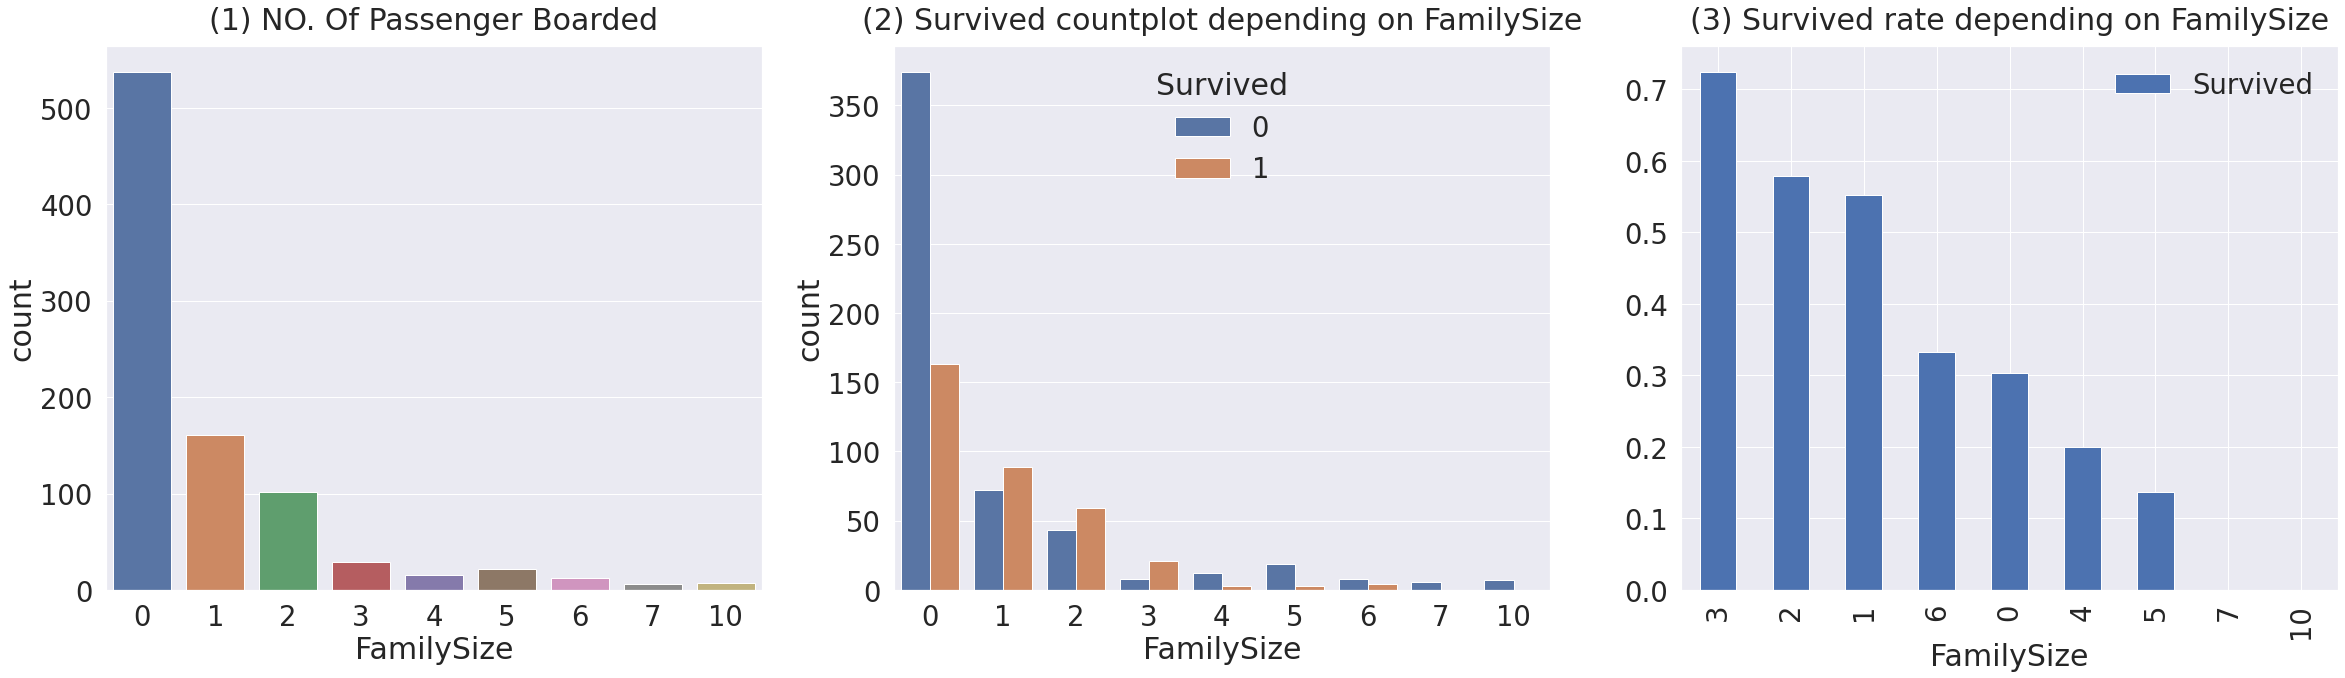

In [71]:
# 이제 익숙해질법한 단계
# 1. subplots()로 canvas 생성
f, ax = plt.subplots(1, 3, figsize=(40,10)) # 1행 3열

# FamilySize 별 크기. ex)가족 수가 0인 값 count..
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) NO. Of Passenger Boarded', y=1.02)

# FamilySize 별 생존0/1 크기. ex)가족 수가 0인 값들 중 생존0/1..
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

# FamilySize 별 생존율. FamilySize를 기준으로 Survived의 평균을 나타내는데, 생존율을 기준으로 내림차순하여 나타내라.
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* ax[0]\
FamilySize가 몇명이 있는지. 1명부터 11명 가족까지 있음.
* ax[1]\
각 FamilySize마다 생존/사망률
* ax[2]\
FamilySize에 따른 생존률. -> FamilySize가 클수록 생존률은 낮아진다. FamilySize는 4,3,2명 정도가 생존률이 높다.

## 2.7 Fare
탑승 요금으로, continuous feature이다. (0.1,0,2..)


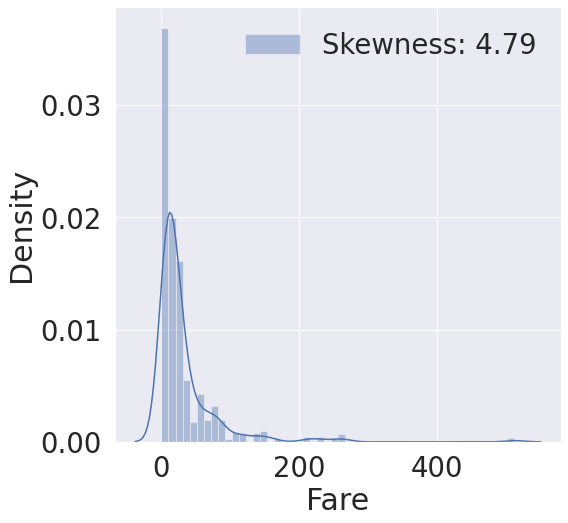

In [72]:
# distplot : Series의 histogram을 보여주는 plot
# skew() : histogram이 얼마나 비대칭인지 알려주는 옵션
# g는 matplotlib 객체(seaborn의 베이스도 matplotlib). 결국 g에 그림객체를 저장한 것.

fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax)) 
g = g.legend(loc='best')


### skewness(왜도)
* 자료의 분포모양이 평균을 중심으로부터 한 쪽으로 치우쳐져있는 경향을 나타내는 척도로, 자료의 분포가 대칭인지 아닌지를 측정해주는 값.
* a=0 정규분포, a>0 좌측으로 치우침(위의 그래프), a<0 우측으로 치우침

### 위의 한쪽으로 쏠린 데이터를 그대로 모델에 학습시키면, 자칫 성능이 낮아질 수도 있음.
데이터의 쏠림 현상을 막기 위해 log를 이용.

In [ ]:
# feature engineering 중 하나. (모델의 성능을 높이기위해 feature를 빼거나 더하거나 등 관리.)
# log를 실행해서, 데이터의 쏠림현상을 줄여줌.
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
# i가 0보다 크면 np.log(i) 실행, i가 0보다 작으면 0 반환

### lambda 함수란?
* 한번만 쓰고 버리려는 이름없는 함수라 생각하기.
* lambda 이용방법\
lambda (반환문) : (실행문)
* 예) lambda i : np.log(i) if i>0 else 0
* 예2) x = lambda i : i * i >>> x(3) = 9  (호출할 때 x(2) 라고 호출)

### map 함수란?
특정 시리즈의 value들에 동일한 operation을 적용하고 싶을 때는 map과 apply를 쓰는데, map은 람다함수&딕셔너리를, apply는 함수를 넣어주면 됨.

## 2.8 Cabin, Ticket

cabin은 null 데이터가 80% 이기 때문에, 데이터가 몇개 없음.
그래서 cabin과의 관계성을 찾기 힘드므로 생략하도록 하겠음.

In [74]:
df_train['Ticket'].value_counts()
# Ticket에는 여러 string이 있는데, 나중에 모델 성능을 높이기위해 
# Ticket 컬럼을 사용하게 되는데, 그때 아이디어를 생각해보기!

1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
           ..
347466      1
29011       1
364512      1
386525      1
248723      1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature Engineering
- 정형 데이터에서 중요한 단계.
- 학습 데이터셋의 패턴이나 feature들이 좋아야 모델이 학습하기 좋음.

## 3-1. Fill Null in 'Age'

### dataset에 존재하는 null data를 채우기. 
- 어떻게 채우냐에따라 성능이 달라지기 때문에 신경써줘야함.
- 공통점을 가진 그룹 안에서 통계적인 수치로 채우자.
- 'Age'에서 null값을 채울 때는 'Name' 컬럼에서 Mr., Mrs., Miss., 등이 모두 있는데, 그걸로 구분해보자.
- 어떻게?\
pandas가 제공하는 정규표현식 extract 함수로.

In [75]:
df_train['Age'].isnull().sum() # null이 177

177

In [76]:
df_train['Age'].mean()  # 모든 null값을 30살로 채우는건 무리..

# 모든 null값에 같은 대체값을 넣기 보다, 그룹마다 나눠서 값을 채워주는게 좋음.
# Name 컬럼의 Mrs, Ms, Miss 등으로 groupby한 후, 각 그룹마다 다른 대체값으로.

29.69911764705882

In [77]:
df_train['Name'][:10] # Mr, Mrs, Miss, Mrs, Mr, Master, Mrs, Mrs, etc..

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [78]:
df_train['Name'].str # string으로 전환.
# 정규표현식은 string에서 뽑아내는 것이므로 string으로 전환!

# extract() : 정규표현식에 맞는 string을 추출해주는 메서드
df_train['Name'].str.extract('([A-Za-z]+)\.') # 알파벳 여러개 에다가 .이 붙은 것.(Mir. Miss. Master.)을 extract하겠다.

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [80]:
# 추출해서 새로운 column(feature) 생성
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

# 테스트셋에도 적용!
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [81]:
# Name을 성별로 구분해서 보여줘라.
# crosstab으로 'Initial' 컬럼과 'Sex' 컬럼을 'summer_r' 배경으로 보여줘라. -> 각 Initial의 남녀 value count를 볼 수 있음.
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


매우 종류가 많으니까, 5개 군으로 치환하자.

In [83]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Don', 'Rev', 'Capt', 'Sir'],
                         ['Miss', 'Miss',' Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Mr', 'Other', 'Mr', 'Mr'], inplace=True)

# df_train['Initial']에 값을 넣는 것 대신에 inplace=True 옵션으로도 손쉽게 데이터변경 가능.

In [84]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,444.000000,1.000000,2.000000,28.000000,0.000000,0.000000,13.000000,0.000000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000
Miss,411.567568,0.702703,2.286486,21.818792,0.702703,0.540541,44.104416,1.243243
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,0.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,1.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,0.222222


Initial
 Miss     1.000000
Master    0.575000
Miss      0.702703
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64


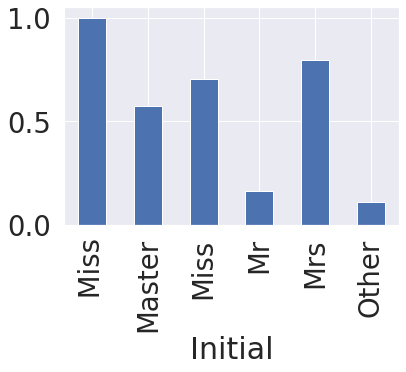

In [86]:
# 'Initial'로 그룹화하고, Initial 별 'Survived' 평균을 확인해보자.
print(df_train.groupby('Initial')['Survived'].mean())
df_train.groupby('Initial')['Survived'].mean().plot.bar() # plot.bar()를 붙여서 바로 막대그래프로 표현 가능하다.

Mr(남자), Other가 생존률이 낮고, Miss,Mrs(여자)가 생존률이 높고, Master(남자 아이)는 중간.

-> 위에서 실행했던 cmap으로 누가 남/여인지 알 수 있음. 보통 Miss, Mr, Mrs의 의미로도 알수 있지만..

In [93]:
# train셋과 test셋 데이터을 합쳐서 이용해볼거임.
# pandas의 데이터셋 합치는 함수는 concat, merge 2개.
# concat : 데이터프레임 위 or 아래 or 옆에 쌓는 것, merge : 같은 컬럼이 있을 때 (중복) 컬럼을 기준으로 합치는 함수.
df_all = pd.concat([df_train, df_test])  # 디폴트는 행 밑으로 합쳐짐. df_test는 'Survived' 컬럼이 없으므로 NaN값이 채워짐.

# 확인.
df_all # index가 변동되지 않은 상태.
df_all.reset_index() # index를 재정렬되면서, 기존의 index가 'index'컬럼으로 생성되서 남아있음. 
df_all.reset_index(drop=True) #drop 옵션을 이용하면 하나의 컬럼으로 자동 생성되는 index컬럼을 없애면서 index 재정렬!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,Mr


In [94]:
df_all.groupby('Initial').mean() # Initial 별 Age의 평균을 확인할 수 있다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,444.000000,1.000000,2.000000,28.000000,0.000000,0.000000,13.000000,0.000000
Col,1058.500000,NaN,1.000000,50.000000,0.500000,0.000000,128.012500,0.500000
Dona,1306.000000,NaN,1.000000,39.000000,0.000000,0.000000,108.900000,0.000000
Dr,1185.000000,NaN,1.000000,53.000000,1.000000,1.000000,81.858300,2.000000
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,36.008195,3.426230
Miss,616.269962,0.702703,2.330798,21.805587,0.657795,0.498099,42.913199,1.155894
Mr,657.305592,0.162571,2.362809,32.510980,0.286086,0.158648,25.133848,0.444733
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,50.686244,1.482412
Ms,980.000000,NaN,3.000000,NaN,0.000000,0.000000,7.750000,0.000000


### Age의 평균을 이용해 null 값을 채워봅시다.

* pandas DataFrame에는 우리가 원하는 column, low를 반환하는 **location 문법**이 있음. 정말 자주 쓰임!

#### **location 문법**
1. index를 이용해서 row, column 반환하는 기능.\
예) *df_train.loc[:4, :]*  -> 4번째 column까지 모든 low 반환.
2. (반환되는) boolean 값을 입력해서 True인 행만 출력하는 기능.
    \
예) df_train['Survived'] == 1 명령은 1인 'Survived' 행은 True.(0은 False)로 표시하는 명령. 이를 이용해서\
    *df_train.loc[df_train['Survived'] == 1]* -> [df_train['Survived'] == 1] 에서 반환되는 True인 행만 반환.\
    \
예2) 'Age'가 null인 행만 출력.
\df_train.loc[df_train['Age'].isnull()]

In [95]:
df_train.loc[:4,:] # 4번째 column까지 모든 low 반환.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr


In [96]:
# 'Age'가 null인 행 다 보여주기
df_train.loc[df_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,10,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,0,Mr


In [97]:
df_train.loc[df_train['Survived'] == 1] # 생존한 행들 보여주기.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,0,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,Miss


In [98]:
# 여러가지 조건을 주어서 찾을 수도 있음.

# 데이터가 없으면서 Initial이 Mr인 행 출력.
(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')

# 그러한 '행'을 출력하는 건 loc 안에 넣어주면됨. => 행에 대한 조건에 맞는 행 출력하려면 loc[] 안에 조건을 넣는다!
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

# 그 행에 컬럼을 지정해주면 해당 컬럼만 출력됨. 여기에 N을 넣으면, 'Age' 컬럼 전체에 N을 입력하는 것. 
#df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 'N'

# 그전에 null에다가 평균을 넣어주기위해 평균 다시 확인.
df_train.groupby('Initial').mean() # 각 Inital(행)의 Age 평균을 확인하여 loc으로 값을 넣어준다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,444.000000,1.000000,2.000000,28.000000,0.000000,0.000000,13.000000,0.000000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000
Miss,411.567568,0.702703,2.286486,21.818792,0.702703,0.540541,44.104416,1.243243
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,0.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,1.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,0.222222


In [99]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33


In [100]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'),'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss')] # null값 확인
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'),'Age'] = 5

# 확인
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')] # null 데이터가 다 채워졌으니 출력안되고
df_train.loc[df_train['Initial'] == 'Mr', 'Age'] # 33.0으로 채워진 것 확인!

# 나머지 'Age' 들도 null값 처리.
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'),'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'),'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'),'Age'] = 46

# df_test에도 적용해줘야하니까
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Master'),'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Miss'),'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Mrs'),'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == 'Other'),'Age'] = 46

# null값 있는지 확인
df_train['Age'].isnull().sum() # 0 확인.

0

#### 해당 word를 한번에 다른 word로 바꾸는 방법! (Find and replace option)
cell 바깥을 클릭 - ESC 버튼 - 'f' 버튼

## 3-2. Fill Null in Embarked and categorize Age

Embarked feature 의 null값을 확인해보고\
value가 continuous인 Age를 카테고리로 바꿔보자.


### (1) Embarked feature 의 null값을 확인

In [101]:
df_train['Embarked'].isnull().sum()

2

In [102]:
df_train.shape

(891, 14)

In [103]:
df_train['Embarked'].value_counts() # 'S'가 644개!

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
# 891개중 2개 null값은 최빈값으로 채우자. 위에서 'S'가 가장 많았음.
df_train['Embarked'].fillna('S', inplace=True)

In [105]:
df_train['Embarked'].isnull().sum()

0

### (2) continuous 인 Age feature를 카테고리로 만들기.

- 정보 손실이 발생할 수 있음. 

ex) 만약, 1-10이 0으로, 10-20이 1로 묶게 되면\
13,15,18 -> 1 이므로, 정보손실이 발생할 수도 있음. 어떤 상황에선 더 좋을 수도.

- location indexing을 통해 Value를 카테고리로 바꿀 수 있지만, 이는 hard coding 이고, 함수를 이용해서 쉽게 변환할 수 있음.

In [106]:
df_train['Age'].value_counts()

33.00    135
22.00     63
36.00     39
24.00     30
18.00     26
        ... 
66.00      1
70.50      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [107]:
df_train['Age_cat'] = 0
df_train.head() # 새로운 열 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0


#### (1) local indexing 이용. (비추)
- Age에 따라 (조건식으로) Age_cat에 카테고리(1-6)로 저장.

In [108]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

# test 셋에도 똑같이.
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [109]:
#df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FamilySize,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,2.0


#### (2) 함수 & apply를 이용 (더 편리)

In [111]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2    
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [112]:
# apply() : 우리가 정의한 함수 category_age에 'Age' value를 적용시키는 함수
df_train['Age'].apply(category_age)

# 함수에 적용된 값을 새로운 열에 추가.
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [113]:
df_train['Age_cat'] == df_train['Age_cat_2']  # 모두 True
#(df_train['Age_cat'] == df_train['Age_cat_2']).any()

0      True
1      True
2      True
3      True
4      True
       ... 
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

* 일치성을 전체 확인할 경우, df_train['Age_cat'] == df_train['Age_cat_2']).all()

* any : 하나라도 true여도 true
* all : 하나라도 false면 flase (전체가 같은 지 확인할 경우)

In [114]:
# column 삭제
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True) # 축(axis)을 1로 두면 열(column)이 사라짐.
df_test.drop(['Age'], axis=1, inplace=True) # test셋도 Age 컬럼지워줌.

## 3-3. Feature engineering - Change string to categorical and Pearson coefficient
String 데이터(카테고리)를 수치(numerical) 데이터로 바꾸기.

In [115]:
# 'Initial'에 어떤 변수가 있는지
df_train.Initial.unique()

# 'Mr', 'Mrs', 'Miss', 'Master','Other' 만 있어야하는데.. 왜 Miss가 두개지?

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', ' Miss'], dtype=object)

In [116]:
df_train.loc[df_train['Initial']=='Master', 'Initial']
# df_train.loc[df_train['Initial']=='Master', 'Initial'] =1 보다 더 쉬운 방법 : map 이용!

df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

0      2.0
1      3.0
2      1.0
3      3.0
4      2.0
      ... 
886    4.0
887    1.0
888    1.0
889    2.0
890    2.0
Name: Initial, Length: 891, dtype: float64

In [117]:
# 적용
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [118]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,FamilySize,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,2.0,0,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,3.0,1,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,2.0,0,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,2.0,0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,3.0,2,2.0


In [119]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,1,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0,2


### Embarked의 S,C,Q를 수치로 변환하기.

In [125]:
# 컬럼의 고유한 value를 알기 위한 명령어.

#df_train.Embarked.unique() # > numpy.ndarray 타입으로 반환
df_train['Embarked'].value_counts() # value별 갯수까지 알려줌.> Series 타입으로 반환

Series([], Name: Embarked, dtype: int64)

In [124]:
# 카테고리 -> 수치화
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,NaN,1,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,NaN,1,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,NaN,0,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,NaN,1,3.0,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,NaN,0,2.0,3


In [ ]:
df_train.head() # 숫자로 바뀐 것을 확인.

2021.03.21. 여기까지

In [ ]:
df_train.Embarked.isnull().any() # True인 null데이터가 하나도 없다.

In [ ]:
df_train['Sex'].unique()

In [ ]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

#### feature들 간 선형적 상관관계 (비례/반비례)
숫자로 변경한 경우, 피어슨 상관계수(Pearson Correlation) 계산이 가능해짐.

In [ ]:
heatmap_data.corr() # corr() : 각 변수(컬럼) 간의 상관관계를 보여주는 메서드

In [ ]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked', 'FamilySize','Initial','Age_cat']]

#colormap = plt.cm.viridis
#colormap = plt.cm.spring
#colormap = plt.cm.summer_r
colormap = plt.cm.RdBu

plt.figure(figsize=(12,10))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap,
           linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f' ) # 모든 타입을 float으로 바꿔주는 astype (캐스팅)

# linewidths : 각 칸 사이의 line 굵기.
# vmax : 색 변화 (수가 커질 수록 색 변화가 고름.)
# square : True라면 각 셀이 정사각형 모양되도록, Axis측면을 '같게' 설정함.
# cmap
# linecolor : 각 셀을 구분하는 line의 색
# annot : True이면 각 셀의 숫자를 나타냄.
# annot_kws={'size'}는 셀에 나타나는 숫자의 사이즈.
# fmt : .2f : 2번째자리까지 반올림.

### 선형관계
- Survived와 Survived는 같은 컬럼이므로, 완전한 선형관계. (1.00이란 값)
- x축에 Survived에서, Sex와 Pclass, Fare가 선형관계가 크고, Embarked, FamilySize, Initial, Age_cat는 적음.
- Initial과 Age_cat 상관관계 있음. -> Initial의 null값 채울 때, 각 Initial의 평균나이로 채웠기 때문에. 
- Pclass와 Age_cat 상관관계 있음.
- redundant하다. ? 만약 Sex와 Fare의 상관관계가 1이라면, 두 컬럼이지만, 결국 하나의 정보를 주고있음.그래도 모든 컬럼이 다 필요하다..?

## 3-4. Feature engineering - One-hot encoding on the Initial and Embarked

- One-hot encoding이란?\
모델의 성능을 높이기 위해 수치화시킨 카테고리를 (0,1)로 이루어진 5차원의 벡터로 나타내는 것이다.\
1이냐 0이냐로 구분할 수 있어서 편함.
- pandas의 get_dummies를 사용하여 가능.
- Inital을 prefix로 두어서 구분이 쉽게 만들어줌.

### 쉽게 말해서, 수치 간의 의미를 없애기 위함이다.
예) 1이 0보다 크다. (이런 크기의 의미를) -> 1은 true, 0은 false. (의미를 없애는 것)

In [ ]:
df_test

In [ ]:
# 옵션 columns : 원핫인코딩할 컬럼
# 옵션 prefix : 원핫인코딩을 하면 컬럼이 생기는데 그 컬럼을 설정.
# pd.get_dummies(df_train, columns=['Initial'], prefix='Initial') 이 dataframe으로 반환하기때문에 바로 df_train에 저장가능.
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [ ]:
df_train.head()
df_test.head()

In [ ]:
# 원핫인코딩을 해줘야할 다른 컬럼! Embarked
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

pandas 외에도 sklearn이라는 머신러닝 라이브러리인 sklearn 중\
from sklearn.preprocessing import OneHotEncoder 사용할 수 있지만, dataframe을 직접다룰 때는 pandas가 훨씬 편함.\

+) 원핫인코딩을 하게되면 value개수만큼 컬럼이 추가되기 때문에 학습할 때 더 안좋을 수 있음.

In [ ]:
df_train.head() 
# 머신러닝을 하기전에, 필요없는 PassengerId, Name, SibSp, Parch, Fare, Cabin을 없애줘야함.

In [ ]:
df_train.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Fare', 'Cabin'], axis=1, inplace=True)

# axis=1 해줘야 column이 다 날라감.

In [ ]:
df_train.head()
#df_test.head()

In [ ]:
# EDA-Null값채우기-Feature Engineering까지 진행 완료.
# 이 dataframe을 이용해서 머신러닝 모델을 만들고 학습시킨 후 실제 테스트셋으로 예측해보는 것을 진행할 예정.

# sklearn은 머신러닝의 처음부터 끝까지 가지고 있는 것.
feature engineering부터 지도/비지도학습~ 평가~ 파이프라인 까지.\
데이터분석과 머신러닝하고 싶다면 sklearn 라이브러리는 숙지해놔야함.
파이썬 라이브러리를 활용한 머신러닝 책 추천

# 4. 모델 생성 - Decesion Tree (결정 트리)
RandomForest는 Decesion Tree들을 Random하게 만들고 Average(앙상블)시킨 것.

In [ ]:
from sklearn.ensemble import RandomForestClassifierssifier # 이진분류 문제이므로, 분류 알고리즘 사용.
from sklearn import metrics # 모델 평가에 쓰이는 함수들을 포함
from sklearn.model_selection import train_test_split # train,valid로 나눌 때 쓰이는 함수

In [ ]:
# train셋에서는 'Survived' 컬럼을 없애고 학습시킬 컬럼들만 남겨둔다.
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values